In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
print(df.columns)

Index(['title', 'full_text', 'generated'], dtype='object')


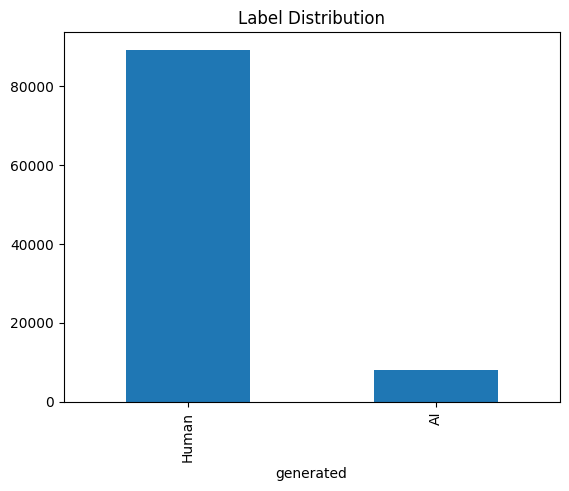

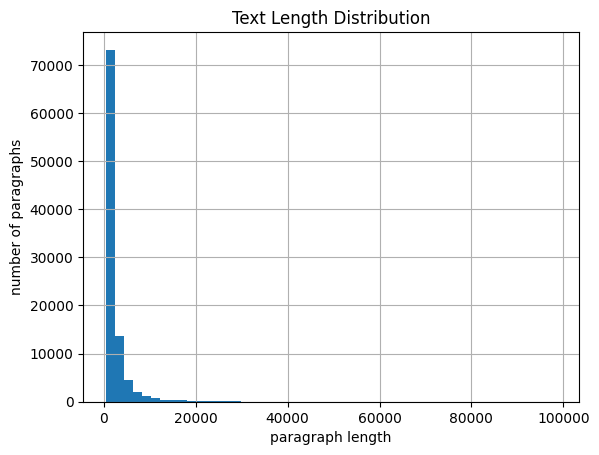

Human 문단 예시:
 카호올라웨섬은 하와이 제도를 구성하는 8개의 화산섬 가운데 하나로 면적은 115.5km2, 높이는 452m이다. 하와이 제도에서 가장 작은 화산섬이자 무인도이며 길이는 18km, 너비는 10km이다. 
 마우이섬에서 남서쪽으로 약 11km 정도 떨어진 곳에 위치하며 라나이섬의 남동쪽에 위치한다. 고도가 낮고 북동쪽에서 불어오는 무역풍을 통해 산악 지대에서 내리는 비를 형성하지 못하기 때문에 건조한 기후를 띤다. 마우이섬 화산의 비그늘에 속해 있기 때문에 섬 전체 면적의 1/4 이상이 부식되어 있다. 
 1000년경부터 사람이 거주했으며 해안 지대에는 소규모 임시 어촌이 형성되었다. 섬 안에는 주민들이 돌로 만든 제단에서 종교 의식을 거행한 흔적들, 주민들이 암석이나 평평한 돌에 그림을 그린 흔적들이 남아 있다. 1778년부터 1800년대까지 이 지역을 지나 항해하던 사람들의 보고에 따르면 카호올라웨섬은 무인도였고 나무도 물도 없는 불모지였다고 한다. 
 1830년대에는 하와이 왕국의 카메하메하 3세 국왕에 의해 남자 죄수들의 유형지로 사용되었지만 1853년에 폐지되었다. 1858년에는 하와이 정부가 목장 사업가들에게 카호올라웨섬을 양도했지만 가뭄과 과도한 방목으로 인해 땅이 말라갔다. 또한 강한 무역풍으로 인해 표토의 대부분이 날아가면서 붉은 경반층만 남게 되었다. 
 1910년부터 1918년까지 하와이 준주가 섬의 원래 모습을 복원하기 위해 이 섬을 천연보호구역으로 지정했지만 큰 성과를 거두지 못했다. 
 1941년 12월 7일에 일어난 일본 제국 해군의 진주만 공격을 계기로 카호올라웨섬은 태평양 전쟁에 참전한 미국 병사들의 훈련소로 사용되었다. 1981년 3월 18일에는 미국 국립사적지에 등재되었다.

AI 문단 예시:
 수난곡(受難曲)은 배우의 연기 없이 무대에 올려지는 성악을 주로 한 종합 예술이다. 이러한 의미에서 오라토리오와 유사하지만, 성경의 사복음서를 기반으로 한 예수 그리스도의 생애를 주로 다루고 있다는 점에서 차이가 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# 라벨 분포
df['generated'].value_counts().plot(kind='bar')
plt.title("Label Distribution")
plt.xticks([0, 1], ['Human', 'AI'])
plt.show()

# 텍스트 길이 분석
df['text_len'] = df['full_text'].apply(len)
df['text_len'].hist(bins=50)
plt.title("Text Length Distribution")
plt.xlabel("paragraph length")
plt.ylabel("number of paragraphs")
plt.show()

# 샘플 보기
print("Human 문단 예시:\n", df[df['generated'] == 0]['full_text'].iloc[0])
print("\nAI 문단 예시:\n", df[df['generated'] == 1]['full_text'].iloc[0])

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44

✅ 평균 문장 길이
Human 평균 길이: 2325.4303351761105
AI 평균 길이: 2298.6607879924954


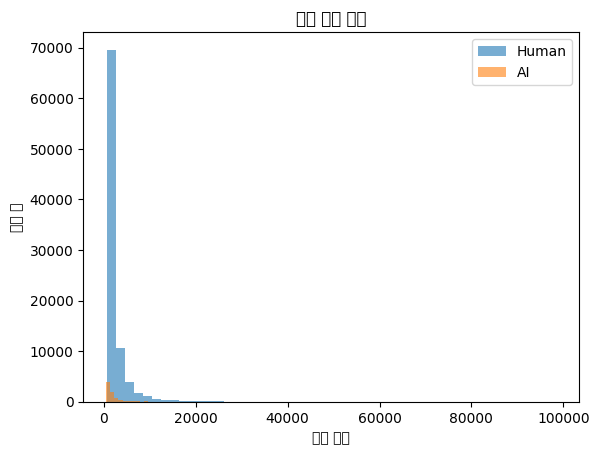

✅ 상위 단어
Human: [('이', 235855), ('수', 227190), ('그', 167947), ('있는', 142725), ('그는', 103350), ('대한', 97867), ('한', 86111), ('및', 85238), ('이후', 83150), ('같은', 82251)]
AI: [('이', 22638), ('수', 22102), ('그', 15798), ('그는', 10776), ('있는', 10759), ('같은', 8813), ('대한', 8160), ('이후', 7866), ('다른', 7708), ('함께', 7688)]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import nltk
nltk.download('punkt')


# 1. 데이터 로드
df = pd.read_csv("train.csv")

# 2. 문장 길이 분석
df['text_length'] = df['full_text'].apply(len)
print("✅ 평균 문장 길이")
print("Human 평균 길이:", df[df['generated'] == 0]['text_length'].mean())
print("AI 평균 길이:", df[df['generated'] == 1]['text_length'].mean())

plt.hist(df[df['generated'] == 0]['text_length'], bins=50, alpha=0.6, label='Human')
plt.hist(df[df['generated'] == 1]['text_length'], bins=50, alpha=0.6, label='AI')
plt.title("문장 길이 분포")
plt.xlabel("문장 길이")
plt.ylabel("문단 수")
plt.legend()
plt.show()

# 3. 단어 빈도 분석
#df["tokens"] = df["full_text"].apply(nltk.word_tokenize)
df["tokens"] = df["full_text"].apply(lambda x: x.split())

human_tokens = [w.lower() for tokens in df[df["generated"] == 0]["tokens"] for w in tokens if w.isalpha()]
ai_tokens = [w.lower() for tokens in df[df["generated"] == 1]["tokens"] for w in tokens if w.isalpha()]

print("✅ 상위 단어")
print("Human:", Counter(human_tokens).most_common(10))
print("AI:", Counter(ai_tokens).most_common(10))

# 4. TF-IDF 단어 상위 시각화
vectorizer = TfidfVectorizer(max_features=50)
X_human = vectorizer.fit_transform(df[df['generated'] == 0]["full_text"])
human_words = vectorizer.get_feature_names_out()

X_ai = vectorizer.fit_transform(df[df['generated'] == 1]["full_text"])
ai_words = vectorizer.get_feature_names_out()

print("✅ TF-IDF 상위 단어 (Human):", human_words[:10])
print("✅ TF-IDF 상위 단어 (AI):", ai_words[:10])

# 5. 워드클라우드 시각화
human_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(human_tokens))
ai_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(ai_tokens))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(human_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Human Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(ai_wc, interpolation='bilinear')
plt.axis('off')
plt.title("AI Word Cloud")
plt.show()